In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv("supermarket_sales.csv")
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
# drop columns invoice id because it is unique for each row and gross margin percentage 
# because it is constant for all rows, so doesn't convey information

sales = sales.drop(["Invoice ID","gross margin percentage"],axis=1)
sales

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,42.3675,1/29/2019,13:46,Ewallet,40.35,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,1022.4900,3/2/2019,17:16,Ewallet,973.80,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,33.4320,2/9/2019,13:22,Cash,31.84,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,69.1110,2/22/2019,15:33,Cash,65.82,3.2910,4.1


### Split the data into train set and test set using train_test_split

In [4]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(sales,test_size=0.2,
                                      random_state=53)
train_set

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating
178,A,Yangon,Normal,Male,Food and beverages,73.88,6,465.4440,3/23/2019,19:16,Ewallet,443.28,22.1640,4.4
264,B,Mandalay,Normal,Male,Sports and travel,54.45,1,57.1725,2/26/2019,19:24,Ewallet,54.45,2.7225,7.9
81,B,Mandalay,Normal,Female,Food and beverages,96.68,3,304.5420,1/26/2019,19:56,Ewallet,290.04,14.5020,6.4
608,A,Yangon,Normal,Male,Fashion accessories,30.61,1,32.1405,1/23/2019,12:20,Ewallet,30.61,1.5305,5.2
872,B,Mandalay,Member,Female,Electronic accessories,21.43,10,225.0150,1/28/2019,11:51,Cash,214.30,10.7150,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,A,Yangon,Member,Female,Health and beauty,10.69,5,56.1225,3/26/2019,11:07,Ewallet,53.45,2.6725,7.6
421,C,Naypyitaw,Normal,Female,Electronic accessories,84.05,3,264.7575,1/23/2019,13:29,Cash,252.15,12.6075,9.8
885,A,Yangon,Normal,Male,Sports and travel,45.58,7,335.0130,1/13/2019,10:03,Cash,319.06,15.9530,5.0
797,A,Yangon,Member,Female,Sports and travel,24.49,10,257.1450,2/22/2019,15:15,Cash,244.90,12.2450,8.1


In [5]:
test_set

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating
721,C,Naypyitaw,Member,Female,Sports and travel,90.63,9,856.4535,1/18/2019,15:28,Cash,815.67,40.7835,5.1
554,A,Yangon,Member,Male,Electronic accessories,19.32,7,142.0020,3/25/2019,18:51,Cash,135.24,6.7620,6.9
687,A,Yangon,Member,Male,Home and lifestyle,63.56,10,667.3800,1/16/2019,17:59,Cash,635.60,31.7800,4.3
914,A,Yangon,Member,Female,Food and beverages,99.60,3,313.7400,2/25/2019,18:45,Cash,298.80,14.9400,5.8
95,A,Yangon,Normal,Male,Electronic accessories,97.16,1,102.0180,3/8/2019,20:38,Ewallet,97.16,4.8580,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,C,Naypyitaw,Normal,Female,Food and beverages,90.24,6,568.5120,1/27/2019,11:17,Cash,541.44,27.0720,6.2
138,B,Mandalay,Normal,Male,Sports and travel,51.91,10,545.0550,2/16/2019,12:21,Cash,519.10,25.9550,8.2
153,C,Naypyitaw,Normal,Female,Food and beverages,16.48,6,103.8240,2/7/2019,18:23,Ewallet,98.88,4.9440,9.9
448,B,Mandalay,Member,Female,Health and beauty,27.07,1,28.4235,1/12/2019,20:07,Credit card,27.07,1.3535,5.3


### 1. Apply the necessary data preprocessing using scikit-learn pipelines.

In [6]:
# custom transformer for discretizing date and time

from pandas import DatetimeIndex as dt

class Discretize_Date_and_Time(): 
    def __init__ (self,discretize=True): 
        self.discretize = discretize
        
    def fit(self, X, y=None): 
        return self
    
    def transform(self, X):
        # discretize date
        # 0. Monday, 1. Tuesday, 2. Wednesday, 
        # 3. Thursday 4. Friday, 5. Saturday, 6. Sunday
        day_of_week = pd.to_datetime(X['Date']).dt.dayofweek
        
        # discretize time
        # 1. Morning (10:00 - 11:59), 2. Afternoon (12:00 - 16:59)
        # 3. Evening (17:00 - 18:59), 4. Night (19:00 - 20:59)
        hour = pd.to_datetime(X['Time'], format='mixed')\
                .dt.strftime('%H').astype('float')
        hour_cat = pd.cut(hour, bins=[0., 11.0, 16.0, 18.0, np.inf], 
                          labels=[1, 2, 3, 4])
        
        # remove old date and time attributes and add discretized ones
        X = X.drop(['Date','Time'],axis=1)
        X['Day of week'] = day_of_week
        X['Time segment'] = hour_cat
        return X

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# pipeline for transforming date and time columns
date_time_modifier = Pipeline([("date_time_modify",Discretize_Date_and_Time())])

# define which categorical attributes are one hot encoded and ordinal encoded
# Customer type would be ordinal encoded because there is an ordering: 
# Member >>> Normal 
# Gender would also be oridnal encoded because we need to 
# classify gender in future steps (target variable)
cat_one_hot_attribs = ['Branch','City', 'Product line',
                       'Payment','Day of week','Time segment']
cat_ord_attribs = ['Gender','Customer type']

# Scale numeric attributes except Unit price and gross income because 
# they are target variables in future models
num_attribs = ['Quantity', 'Total', 'cogs', 'Rating']

# define pipelines for corresponding columns
cat_one_hot_pipeline = Pipeline([("cat_one_hot",OneHotEncoder())])
cat_ord_pipeline = Pipeline([("cat_ord",OrdinalEncoder())])
num_pipeline = Pipeline([("std_scaler",StandardScaler())])

encode_and_scale = ColumnTransformer([
                ("one_hot",cat_one_hot_pipeline,cat_one_hot_attribs),
                ("ord",cat_ord_pipeline,cat_ord_attribs),
                ("num",num_pipeline,num_attribs)],remainder="passthrough")


full_pipeline = Pipeline([("date_time",date_time_modifier),
                         ("encode_and_scale",encode_and_scale)])


In [8]:
# fit and apply train set
train_set_prepared = full_pipeline.fit_transform(train_set)
train_set_prepared.shape

(800, 34)

Branch has 3 categories ,so **3** columns.
City has 3 categories,so **3** columns.
Product line has 6 categories, so **6** columns.
Payment has 3 categories, so **3** columns.
Day of week has 7 categories, so **7** columns.
Time segment has 4 categories, so **4** columns.
Gender **1** column and Customer type **1** column.
Quantity,Total,cogs,Rating,Unit prices, income are numerical columns, so total **6** columns.
Hence, there are total **34** columns. That's why shape is (800,34)

In [9]:
# apply on test set
test_set_prepared = full_pipeline.transform(test_set)
test_set_prepared.shape

(200, 34)

In [10]:
# define column names for data
columns = ['Branch A','Branch B','Branch C',
            'City Yangon', 'City Mandalay', 'City Naypyitaw', 
           'Fashion accessories', 'Electronic accessories', 'Food and beverages',
           'Sports and travel', 'Home and lifestyle', 'Health and beauty',
            'Ewallet', 'Cash', 'Credit card',
            'Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday',
            'Morning', 'Afternoon', 'Evening', 'Night',
            'Gender',
            'Customer type',
            'Quantity', 
            'Total', 
             'cogs',
            'Rating',
            'Unit price',
            'gross income']

In [11]:
df_train = pd.DataFrame(train_set_prepared,
                        columns=columns)
df_train

,Branch A,Branch B,Branch C,City Yangon,City Mandalay,City Naypyitaw,Fashion accessories,Electronic accessories,Food and beverages,Sports and travel,...,Evening,Night,Gender,Customer type,Quantity,Total,cogs,Rating,Unit price,gross income
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.159581,0.570690,0.570690,-1.460106,73.88,22.1640
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,-1.551748,-1.085631,-1.085631,0.569732,54.45,2.7225
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,-0.867216,-0.082075,-0.082075,-0.300199,96.68,14.5020
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,-1.551748,-1.187183,-1.187183,-0.996143,30.61,1.5305
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.528645,-0.404709,-0.404709,-0.416189,21.43,10.7150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.182684,-1.089891,-1.089891,0.395746,10.69,2.6725
796,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.867216,-0.243477,-0.243477,1.671644,84.05,12.6075
797,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.501847,0.041543,0.041543,-1.112134,45.58,15.9530
798,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.528645,-0.274361,-0.274361,0.685723,24.49,12.2450


In [12]:
# save test data 
import joblib

df_test = pd.DataFrame(test_set_prepared,
                       columns=columns)
joblib.dump(df_test,"test_data_for_regression.pkl");

### 2. Train a multiple linear regression with and without Lasso regularization to predict gross income.

We will select the features which greatly impact or have strong correlation with target variable gross income from dataset.

In [13]:
# correlation between gross income and other attributes

df_train.corr()["gross income"].sort_values(ascending=False)

gross income              1.000000
cogs                      1.000000
Total                     1.000000
Quantity                  0.706839
Unit price                0.640043
Home and lifestyle        0.045039
City Mandalay             0.035593
Branch C                  0.035593
Cash                      0.025972
Sunday                    0.025106
Saturday                  0.021941
Thursday                  0.015088
Tuesday                   0.013141
City Yangon               0.011296
Branch B                  0.011296
Afternoon                 0.009468
Fashion accessories       0.008531
Night                     0.005400
Health and beauty         0.003659
Sports and travel         0.003404
Morning                  -0.005731
Ewallet                  -0.007035
Customer type            -0.007357
Friday                   -0.008611
Evening                  -0.012150
Credit card              -0.018397
Electronic accessories   -0.025849
Wednesday                -0.026211
Gender              

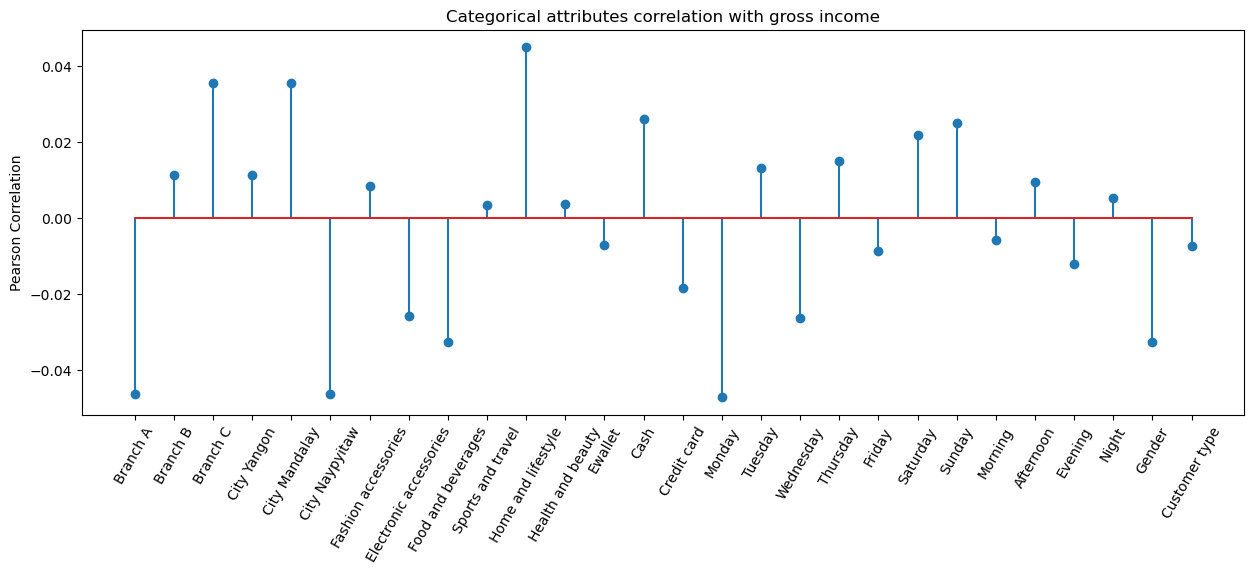

In [14]:
# visualize correlation of categorical attributes with gross income
gross_income_corr = df_train.corr()["gross income"]
plt.figure(figsize=(15,5))
plt.stem(gross_income_corr[:28])
plt.xticks(range(len(gross_income_corr[:28])),columns[:28],rotation=60)
plt.ylabel("Pearson Correlation")
plt.title("Categorical attributes correlation with gross income");

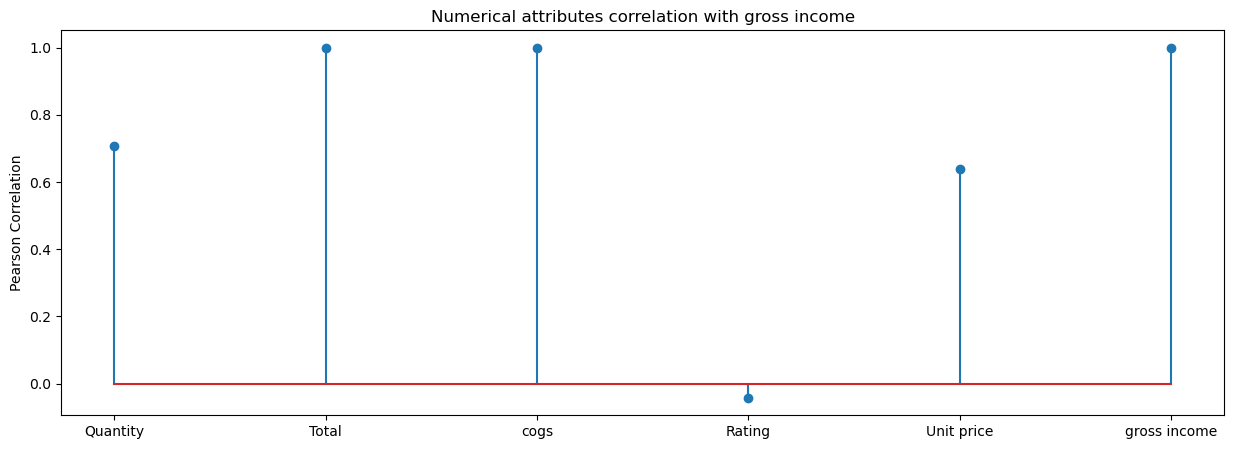

In [15]:
# visualize correlation of numerical attributes with gross income
plt.figure(figsize=(15,5))
plt.stem(gross_income_corr[28:])
plt.xticks(range(len(gross_income_corr[28:])),columns[28:])
plt.ylabel("Pearson Correlation")
plt.title("Numerical attributes correlation with gross income");

Numerical attributes: Quantity and Unit price have high correlation with gross income. Total and cogs features are perfectly correlated (correlation=1) so, can't take them as features. Dropping rating as well since it has very low correlation.

In [16]:
gross_income_attributes = columns.copy()
elements_to_remove = ['Total','cogs','Rating']
gross_income_attributes = list(filter(lambda x: 
                          x not in elements_to_remove, gross_income_attributes))
gross_income_attributes

['Branch A',
 'Branch B',
 'Branch C',
 'City Yangon',
 'City Mandalay',
 'City Naypyitaw',
 'Fashion accessories',
 'Electronic accessories',
 'Food and beverages',
 'Sports and travel',
 'Home and lifestyle',
 'Health and beauty',
 'Ewallet',
 'Cash',
 'Credit card',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Morning',
 'Afternoon',
 'Evening',
 'Night',
 'Gender',
 'Customer type',
 'Quantity',
 'Unit price',
 'gross income']

In [17]:
# save gross income attributes

joblib.dump(gross_income_attributes,"gross_income_attributes.pkl");

In [18]:
X_train = df_train[gross_income_attributes[:-1]]
t_train = df_train[gross_income_attributes[-1]]
X_train.shape,t_train.shape

((800, 30), (800,))

In [19]:
# without lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from scipy import stats

lin_reg = LinearRegression()
lin_reg.fit(X_train, t_train)
y_train = lin_reg.predict(X_train)

scores = cross_val_score(lin_reg, 
                         X_train, t_train,
                         n_jobs=-1,
                         cv=10, 
                         scoring='r2')

confidence = 0.95
print('r2 scores: ', r2_score(t_train, y_train))
print('95% CI: ', stats.t.interval(confidence, len(scores) - 1,
                 loc=scores.mean(),
                 scale=scores.std(ddof=1)/np.sqrt(len(scores))))

r2 scores:  0.8915989865026306
95% CI:  (0.8684527077561283, 0.8944050981320147)


In [20]:
# save the model (without lasso)
joblib.dump(lin_reg,"lin_reg_without_lasso_gi.pkl");

In [21]:
w = np.hstack((lin_reg.intercept_, lin_reg.coef_))
w

array([-8.20419373e-02, -4.43752771e-02, -2.35648472e-02,  6.79401243e-02,
       -2.35648472e-02,  6.79401243e-02, -4.43752771e-02,  1.44842350e-01,
       -5.00761553e-02, -8.43490014e-02, -2.53866538e-01,  4.36981473e-01,
       -1.93532129e-01, -1.85251108e-01,  4.01435083e-01, -2.16183975e-01,
       -2.37828017e-01,  6.21395275e-01, -4.99347753e-01,  1.40234810e-01,
       -1.90575432e-01,  4.02204902e-01, -2.36083785e-01, -2.25069573e-01,
        2.46643664e-01,  1.13609043e-01, -1.35183134e-01,  2.93262167e-03,
        1.17129649e-01,  8.10732768e+00,  2.77234227e-01])

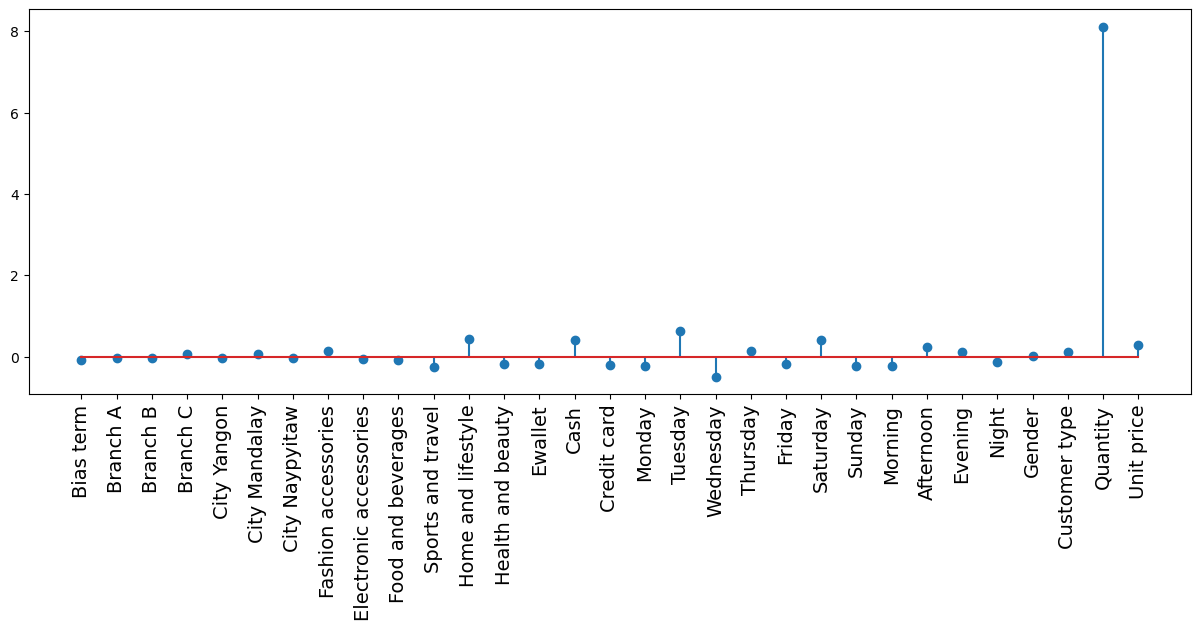

In [22]:
plt.figure(figsize=(15,5))
plt.stem(w)
plt.xticks(range(len(w)), np.hstack(('Bias term', 
         gross_income_attributes[:-1])), rotation=90, size=14);

In [23]:
coeff_data = pd.DataFrame(data=w, columns=['Coefficients'],
             index=np.hstack(('Bias term', 
                    gross_income_attributes[:-1])))
coeff_data

,Coefficients
Bias term,-0.082042
Branch A,-0.044375
Branch B,-0.023565
Branch C,0.067940
City Yangon,-0.023565
City Mandalay,0.067940
City Naypyitaw,-0.044375
Fashion accessories,0.144842
Electronic accessories,-0.050076
Food and beverages,-0.084349


Clearly, quantity is the main factor which impacts gross income.

In [24]:
# linear regression with lasso

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
param_grid = {'alpha': np.linspace(0.05,0.2,1000)}
grid_search = GridSearchCV(lasso,param_grid, 
                           cv=10, 
                           n_jobs=-1,
                           refit=True,
                           scoring='r2')
grid_search.fit(X_train, t_train)

grid_search.best_params_

{'alpha': 0.08723723723723725}

In [25]:
lin_reg_lasso = grid_search.best_estimator_

lin_reg_lasso

Lasso(alpha=0.08723723723723725)

In [26]:
y_train = lin_reg_lasso.predict(X_train)

scores = cross_val_score(lin_reg_lasso, 
                        X_train, t_train,
                        n_jobs=-1,
                        cv=10, 
                        scoring='r2')

confidence = 0.95
print('r2 scores: ', r2_score(t_train, y_train))
print('95% CI: ', stats.t.interval(confidence, len(scores) - 1,
                 loc=scores.mean(),
                 scale=scores.std(ddof=1)/np.sqrt(len(scores))))

r2 scores:  0.8896394278508686
95% CI:  (0.8732725053022183, 0.8978864455877122)


In [27]:
# save linear regression with lasso

joblib.dump(lin_reg_lasso,"lin_reg_with_lasso_gi.pkl");

In [28]:
w = np.hstack((lin_reg_lasso.intercept_, lin_reg_lasso.coef_))
w

array([ 3.77758563e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.47804683e-01, -0.00000000e+00,
       -0.00000000e+00,  3.84084437e-04, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  8.04337146e+00,  2.76727123e-01])

If you see, Lasso made some coefficients zero. (sparsity)

In [29]:
# print non-zero attributes
non_zero_coef = np.where(lin_reg_lasso.coef_!=0)[0]
result=[]
for index in non_zero_coef:
    result.append(gross_income_attributes[index])
result

['Cash', 'Tuesday', 'Quantity', 'Unit price']

So, linear regression with Lasso has choosen Cash, Tuesday, Quantity and Unit price as impactful features to gross income. And the best value for hyperparameter lambda is 0.08. Also, the CI for Lasso linear regression model is narrower than without lasso indicating Lasso linear regression performs better than without lasso.

### 3. Train a multiple linear regression with and without Lasso regularization to predict Unit price.

We will select the features which greatly impact or have strong correlation with target variable unit price from dataset.

In [30]:
# correlation between gross income and other attributes
df_train.corr()["Unit price"].sort_values(ascending=False)

Unit price                1.000000
Total                     0.640043
cogs                      0.640043
gross income              0.640043
Ewallet                   0.046801
Gender                    0.041072
Electronic accessories    0.037773
Thursday                  0.028899
Health and beauty         0.027592
City Yangon               0.026501
Branch B                  0.026501
Quantity                  0.022376
Branch C                  0.021827
City Mandalay             0.021827
Morning                   0.019903
Night                     0.012397
Saturday                  0.011929
Monday                    0.011611
Home and lifestyle        0.002132
Sunday                    0.001696
Friday                    0.000986
Rating                   -0.000504
Sports and travel        -0.003508
Evening                  -0.005358
Credit card              -0.021178
Afternoon                -0.021638
Food and beverages       -0.024389
Tuesday                  -0.026221
Cash                

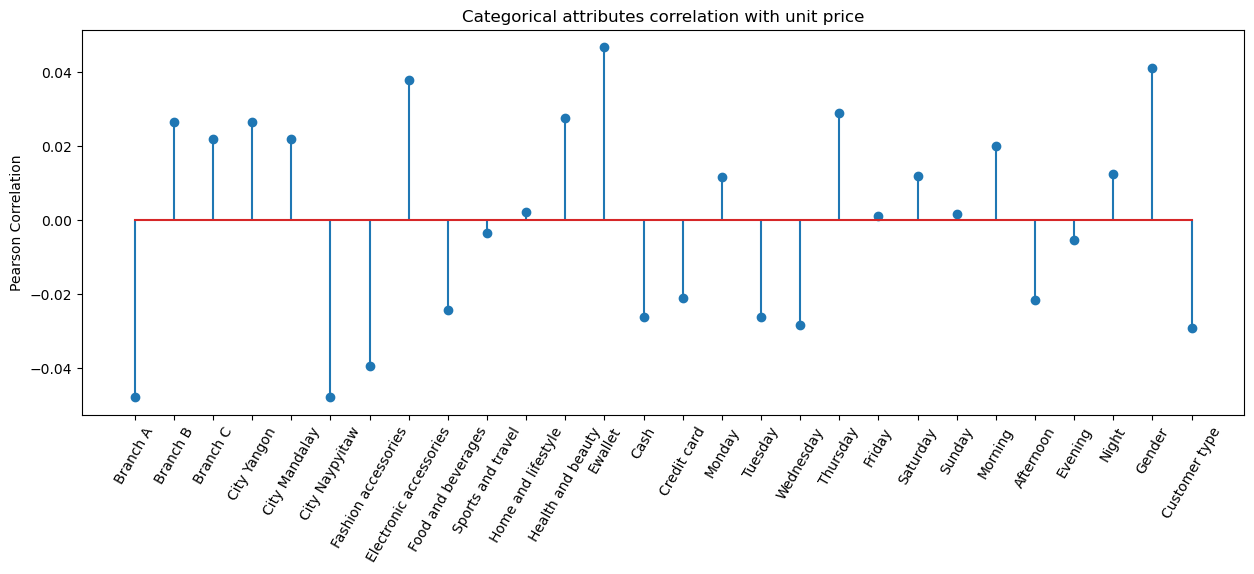

In [31]:
# visualize correlation of categorical attributes with unit price
unit_price_columns = columns.copy()
t=unit_price_columns[-1]
unit_price_columns[-1] = unit_price_columns[-2]
unit_price_columns[-2] = t
unit_price_columns
unit_price_corr = df_train.corr()["Unit price"]
plt.figure(figsize=(15,5))
plt.stem(unit_price_corr[:28])
plt.xticks(range(len(unit_price_corr[:28])),
           unit_price_columns[:28],rotation=60)
plt.ylabel("Pearson Correlation")
plt.title("Categorical attributes correlation with unit price");

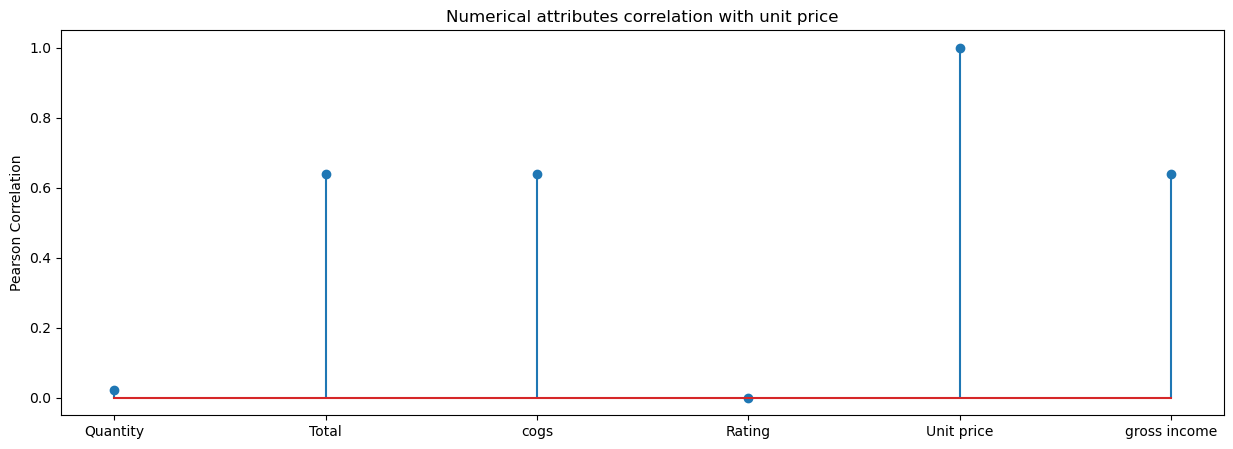

In [32]:
# visualize correlation of numerical attributes with unit price
plt.figure(figsize=(15,5))
plt.stem(unit_price_corr[28:])
plt.xticks(range(len(unit_price_corr[28:])),columns[28:])
plt.ylabel("Pearson Correlation")
plt.title("Numerical attributes correlation with unit price");

Quantity and rating alomst have no correlation with unit price. But, in question it is asked to determine relationship with quantity. So, can drop only rating feature. Total cogs and gross income have same correlation with unit price. So, can consider only one feature(gross income)

In [33]:
unit_price_attributes = unit_price_columns.copy()
elements_to_remove = ['Total','cogs','Rating']
unit_price_attributes = list(filter(lambda x: 
                        x not in elements_to_remove, unit_price_attributes))
unit_price_attributes

['Branch A',
 'Branch B',
 'Branch C',
 'City Yangon',
 'City Mandalay',
 'City Naypyitaw',
 'Fashion accessories',
 'Electronic accessories',
 'Food and beverages',
 'Sports and travel',
 'Home and lifestyle',
 'Health and beauty',
 'Ewallet',
 'Cash',
 'Credit card',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Morning',
 'Afternoon',
 'Evening',
 'Night',
 'Gender',
 'Customer type',
 'Quantity',
 'gross income',
 'Unit price']

In [34]:
# save unit price attributes
joblib.dump(unit_price_attributes,"unit_price_attributes.pkl");

In [35]:
X_train = df_train[unit_price_attributes[:-1]]

t_train = df_train[unit_price_attributes[-1]]

X_train.shape, t_train.shape

((800, 30), (800,))

In [36]:
# linear regression without lasso

lin_reg = LinearRegression()
lin_reg.fit(X_train, t_train)
y_train = lin_reg.predict(X_train)

scores = cross_val_score(lin_reg, 
                         X_train, t_train,
                         n_jobs=-1,
                         cv=10, 
                         scoring='r2')

confidence = 0.95
print('r2 scores: ', r2_score(t_train, y_train))
print('95% CI: ', stats.t.interval(confidence, len(scores) - 1,
                 loc=scores.mean(),
                 scale=scores.std(ddof=1)/np.sqrt(len(scores))))

r2 scores:  0.7838946460322088
95% CI:  (0.7400927434606275, 0.799723054494722)


In [37]:
# save model
joblib.dump(lin_reg,"lin_reg_without_lasso_up.pkl");

In [38]:
w = np.hstack((lin_reg.intercept_, lin_reg.coef_))
w

array([-1.52095991e+13,  2.38336248e+13,  7.99355549e+12,  7.03312972e+12,
        6.76100771e+12,  7.72143348e+12, -9.07906158e+12,  1.96576127e+11,
        1.96576127e+11,  1.96576127e+11,  1.96576127e+11,  1.96576127e+11,
        1.96576127e+11, -1.17916453e+11, -1.17916453e+11, -1.17916453e+11,
       -1.44772712e+11, -1.44772712e+11, -1.44772712e+11, -1.44772712e+11,
       -1.44772712e+11, -1.44772712e+11, -1.44772712e+11,  5.21148937e+11,
        5.21148937e+11,  5.21148937e+11,  5.21148937e+11,  5.60237793e-01,
       -7.52451614e-01, -2.26205034e+01,  2.81908825e+00])

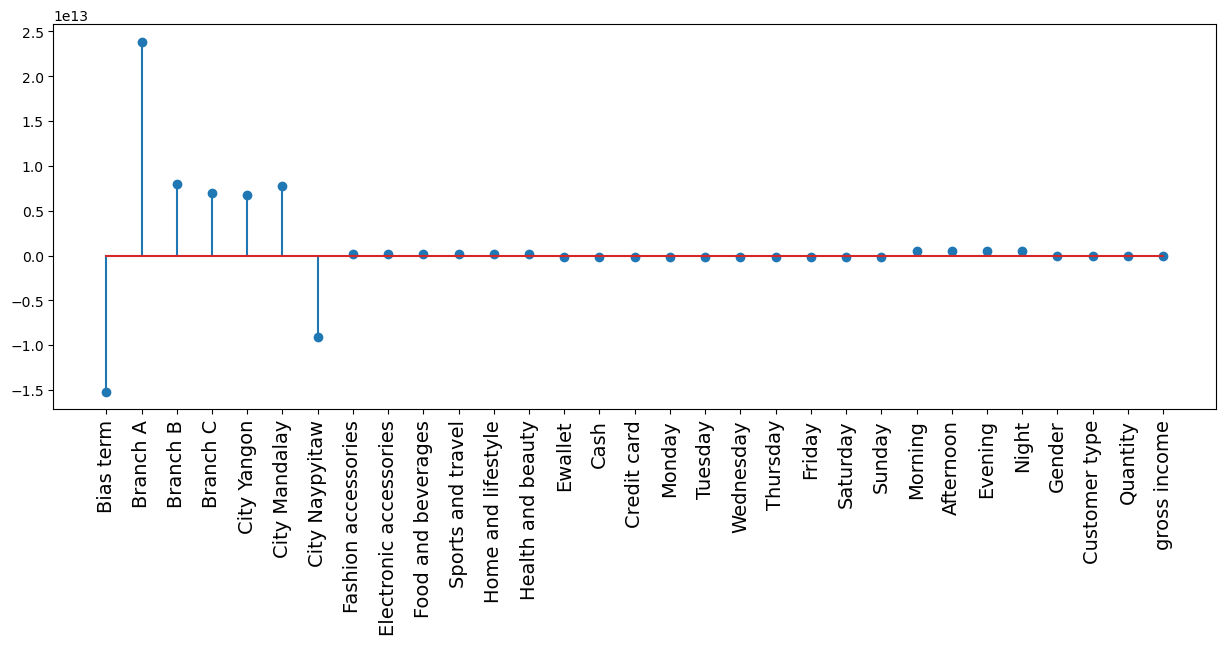

In [39]:
plt.figure(figsize=(15,5))
plt.stem(w)
plt.xticks(range(len(w)), np.hstack(('Bias term', unit_price_attributes[:-1])), rotation=90, size=14);

Linear regression without lasso gave importance to branches and city features for predicting unit price. 

In [40]:
pd.DataFrame(data=w, columns=['Coefficients'],
             index=np.hstack(('Bias term', unit_price_attributes[:-1])))

,Coefficients
Bias term,-1.520960e+13
Branch A,2.383362e+13
Branch B,7.993555e+12
Branch C,7.033130e+12
City Yangon,6.761008e+12
City Mandalay,7.721433e+12
City Naypyitaw,-9.079062e+12
Fashion accessories,1.965761e+11
Electronic accessories,1.965761e+11
Food and beverages,1.965761e+11


In [41]:
# linear regression with lasso

lasso = Lasso()
param_grid = {'alpha': np.linspace(0.01,0.5,500)}
grid_search = GridSearchCV(lasso,param_grid, 
                           cv=10, 
                           n_jobs=-1,
                           refit=True,
                           scoring='r2')
grid_search.fit(X_train, t_train)

grid_search.best_params_

{'alpha': 0.272184368737475}

In [42]:
lin_reg_lasso = grid_search.best_estimator_

lin_reg_lasso

Lasso(alpha=0.272184368737475)

In [43]:
y_train = lin_reg_lasso.predict(X_train)

scores = cross_val_score(lin_reg_lasso, 
                        X_train, t_train,
                        n_jobs=-1,
                        cv=10, 
                        scoring='r2')

confidence = 0.95
print('r2 scores: ', r2_score(t_train, y_train))
print('95% CI: ', stats.t.interval(confidence, len(scores) - 1,
                 loc=scores.mean(),
                 scale=scores.std(ddof=1)/np.sqrt(len(scores))))

r2 scores:  0.7797665837469525
95% CI:  (0.7469053186043333, 0.8058673132010952)


In [44]:
# save model
joblib.dump(lin_reg_lasso,"lin_reg_with_lasso_up.pkl");

In [45]:
lin_reg_lasso.intercept_, lin_reg_lasso.coef_

(12.831786739738867,
 array([ -0.        ,   0.        ,  -0.        ,   0.        ,
         -0.        ,  -0.        ,  -0.        ,   0.        ,
         -0.        ,   0.        ,  -0.        ,   0.        ,
          0.        ,  -0.62461262,   0.        ,   0.        ,
         -0.21553425,   0.        ,   0.        ,   0.        ,
         -0.        ,   0.        ,   0.        ,  -0.        ,
         -0.        ,   0.        ,   0.        ,  -0.        ,
        -22.18259066,   2.7791724 ]))

In [46]:
# non-zero attributes
non_zero_coef = np.where(lin_reg_lasso.coef_!=0)[0]
result=[]
for index in non_zero_coef:
    result.append(unit_price_attributes[index])
result


['Cash', 'Tuesday', 'Quantity', 'gross income']

With lasso regualrizer on predicting unit price, we got hyperparameter lambda as 0.27 which is best fit. When I printed the coefficients, lasso made many coefficients zero(sparse) and the feature quantity has negative correlation with unit price(-22). Both with and without lasso are doing almost the same (performance wise) for predicting unit price.

### 4. Classify Gender

In [47]:
df_train

,Branch A,Branch B,Branch C,City Yangon,City Mandalay,City Naypyitaw,Fashion accessories,Electronic accessories,Food and beverages,Sports and travel,...,Evening,Night,Gender,Customer type,Quantity,Total,cogs,Rating,Unit price,gross income
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.159581,0.570690,0.570690,-1.460106,73.88,22.1640
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,-1.551748,-1.085631,-1.085631,0.569732,54.45,2.7225
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,-0.867216,-0.082075,-0.082075,-0.300199,96.68,14.5020
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,-1.551748,-1.187183,-1.187183,-0.996143,30.61,1.5305
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.528645,-0.404709,-0.404709,-0.416189,21.43,10.7150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.182684,-1.089891,-1.089891,0.395746,10.69,2.6725
796,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.867216,-0.243477,-0.243477,1.671644,84.05,12.6075
797,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.501847,0.041543,0.041543,-1.112134,45.58,15.9530
798,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.528645,-0.274361,-0.274361,0.685723,24.49,12.2450


We need to scale unit price and gross income attributes now, as they are input variables for classification.

In [48]:
date_time_modifier = Pipeline([("date_time_modify",Discretize_Date_and_Time())])
cat_one_hot_attribs = ['Branch','City', 'Product line',
                       'Payment','Day of week','Time segment']
cat_ord_attribs = ['Gender','Customer type']

# add numeric attributes unit price and 
# gross income now as they are input variables
num_attribs = ['Quantity', 'Total', 'cogs', 
               'Rating','Unit price','gross income']

# define pipelines for corresponding columns
cat_one_hot_pipeline = Pipeline([("cat_one_hot",OneHotEncoder())])
cat_ord_pipeline = Pipeline([("cat_ord",OrdinalEncoder())])
num_pipeline = Pipeline([("std_scaler",StandardScaler())])

encode_and_scale = ColumnTransformer([
                ("one_hot",cat_one_hot_pipeline,cat_one_hot_attribs),
                ("ord",cat_ord_pipeline,cat_ord_attribs),
                ("num",num_pipeline,num_attribs)])


full_pipeline = Pipeline([("date_time",date_time_modifier),
                         ("encode_and_scale",encode_and_scale)])


In [49]:
train_set_prepared_clf = full_pipeline.fit_transform(train_set)
df_train_clf = pd.DataFrame(train_set_prepared_clf,columns=columns)
df_train_clf

,Branch A,Branch B,Branch C,City Yangon,City Mandalay,City Naypyitaw,Fashion accessories,Electronic accessories,Food and beverages,Sports and travel,...,Evening,Night,Gender,Customer type,Quantity,Total,cogs,Rating,Unit price,gross income
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.159581,0.570690,0.570690,-1.460106,0.690693,0.570690
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,-1.551748,-1.085631,-1.085631,0.569732,-0.042720,-1.085631
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,-0.867216,-0.082075,-0.082075,-0.300199,1.551312,-0.082075
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,-1.551748,-1.187183,-1.187183,-0.996143,-0.942596,-1.187183
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.528645,-0.404709,-0.404709,-0.416189,-1.289108,-0.404709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.182684,-1.089891,-1.089891,0.395746,-1.694505,-1.089891
796,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.867216,-0.243477,-0.243477,1.671644,1.074574,-0.243477
797,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.501847,0.041543,0.041543,-1.112134,-0.377531,0.041543
798,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.528645,-0.274361,-0.274361,0.685723,-1.173604,-0.274361


In [50]:
test_set_prepared_clf = full_pipeline.transform(test_set)
df_test_clf = pd.DataFrame(test_set_prepared_clf,columns=columns)

In [51]:
# save preprocessed pipeline for classification

joblib.dump(df_test_clf,"test_data_for_classification.pkl");

In [52]:
X_train = df_train_clf.drop(['Gender'],axis=1)
t_train = df_train_clf['Gender']

X_train.shape,t_train.shape

((800, 33), (800,))

In [53]:
gc_columns = columns.copy()
gc_columns.remove('Gender')
gc_columns

['Branch A',
 'Branch B',
 'Branch C',
 'City Yangon',
 'City Mandalay',
 'City Naypyitaw',
 'Fashion accessories',
 'Electronic accessories',
 'Food and beverages',
 'Sports and travel',
 'Home and lifestyle',
 'Health and beauty',
 'Ewallet',
 'Cash',
 'Credit card',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Morning',
 'Afternoon',
 'Evening',
 'Night',
 'Customer type',
 'Quantity',
 'Total',
 'cogs',
 'Rating',
 'Unit price',
 'gross income']

In [54]:
# build logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

log_reg = Pipeline([("poly_feat",PolynomialFeatures(degree=2,
                     interaction_only=True)),
                     ("log_reg",LogisticRegression(tol=0.03))])

log_reg.fit(X_train,t_train)

Pipeline(steps=[('poly_feat', PolynomialFeatures(interaction_only=True)),
                ('log_reg', LogisticRegression(tol=0.03))])

In [55]:
# access coefficients using named_steps

log_reg.named_steps["log_reg"].coef_

array([[-0.02461409,  0.02376369,  0.03756395, -0.08594174,  0.03756395,
        -0.08594174,  0.02376369,  0.05234154, -0.14664299,  0.05298372,
         0.28088968, -0.09405265, -0.17013338, -0.08721262, -0.10398304,
         0.16658157, -0.08080185, -0.05212972,  0.14166761,  0.17337202,
        -0.10780818, -0.02382559, -0.07508838, -0.13334068, -0.03184338,
         0.13362618,  0.00694379,  0.05649685, -0.08537108, -0.01053689,
        -0.01053689,  0.11319249,  0.00864129, -0.01053689,  0.        ,
         0.        ,  0.        ,  0.        ,  0.02376369, -0.06331199,
        -0.04852118,  0.22952207, -0.02407895, -0.17804277,  0.10819652,
        -0.15988265,  0.07626163,  0.10738471, -0.11402351, -0.24182035,
         0.23716825,  0.07861114,  0.18726257,  0.07666582, -0.20010022,
         0.08651955, -0.13791385, -0.03476098,  0.10991897,  0.01317501,
        -0.24271603,  0.14396359,  0.14396359,  0.14418129, -0.35579533,
         0.14396359,  0.        ,  0.03756395,  0. 

To know what are the feature combinations, we can use powers.

In [56]:
log_reg.named_steps["poly_feat"].powers_

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [57]:
log_reg.named_steps["poly_feat"].powers_.shape

(562, 33)

Hence, there are total 562 features or attributes obtained from 2nd order interaction of 33 attributes.

In [58]:
# display some combination of features

power_matrix = log_reg.named_steps["poly_feat"].powers_
comb_list=[]
for i in range(10):
    randomIndex = np.random.randint(0,len(power_matrix))
    result="";
    for idx,num in enumerate(power_matrix[randomIndex,:]):
        if num==1:
            result+=gc_columns[idx]+" + "
    comb_list.append(result[:-2])
            
comb_list

['Wednesday + Friday ',
 'City Yangon + Food and beverages ',
 'City Mandalay + Afternoon ',
 'Food and beverages + Health and beauty ',
 'Health and beauty + Morning ',
 'Branch B + Morning ',
 'City Mandalay + Total ',
 'Home and lifestyle + Evening ',
 'Night + Total ',
 'Branch C + Health and beauty ']

I have taken random index from polynomial powers matrix and selected which combination of features that particular row corresponds to.

In [59]:
# predictions

from sklearn.metrics import accuracy_score

y_train= log_reg.predict(X_train)

scores= cross_val_score(log_reg, 
                        X_train, t_train,
                        n_jobs=-1,
                        cv=10, 
                        scoring='accuracy')


confidence = 0.95
print('Training accuracy: ', accuracy_score(t_train, y_train))
print('95% CI: ', stats.t.interval(confidence, len(scores) - 1,
                 loc=scores.mean(),
                 scale=scores.std(ddof=1)/np.sqrt(len(scores))))

Training accuracy:  0.76125
95% CI:  (0.4530671657212499, 0.5444328342787501)


In [60]:
# save the model

joblib.dump(log_reg,"log_reg_gender.pkl");

#### For Gender=male customers, plot the parameters values for all attributes (and its 2nd-order interactions).

In [61]:
# get all feature combinations and degree 2 interactions into combination list

comb_list = ['Intercept'] # first term is intercept
N = power_matrix.shape[0]

for i in range(1,N):
    t=[]
    for index,num in enumerate(power_matrix[i,:]):
        if num==1:
            t.append(gc_columns[index])
    
    if len(t)==1:
        comb_list += [t[0]]
    else:
        comb_list += [t[0]+' + '+t[1]]
        
comb_list = np.array(comb_list)

comb_list.shape

(562,)

In [62]:
# get the weights for the logistic regression

w = log_reg.named_steps['log_reg'].coef_.T

w.shape

(562, 1)

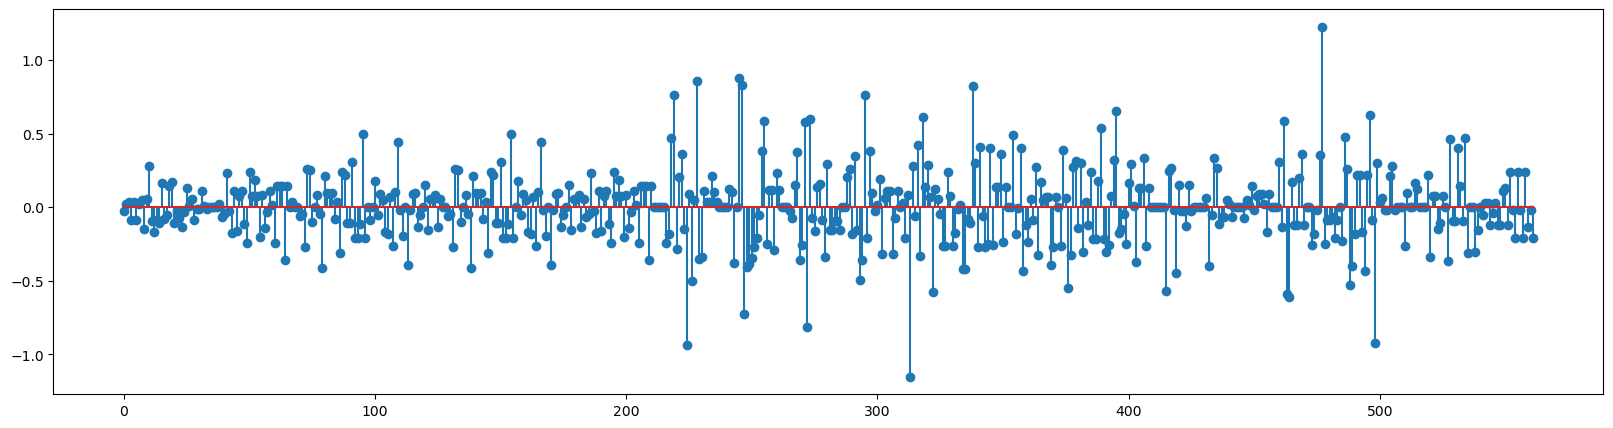

In [63]:
# plotting weight values for all attributes and 
# 2nd degree interactions

plt.figure(figsize=(20,5))
plt.stem(w);

In [64]:
# display weights and corresponding features for a random sample of 40

comb_data = np.concatenate((w,comb_list.reshape(-1,1)),axis=1)
weights_and_features = pd.DataFrame(comb_data,columns=['Weights','Features'])
weights_and_features.sample(40)

,Weights,Features
211,0.0,Fashion accessories + Electronic accessories
73,0.25805303130945867,Branch B + Sports and travel
358,-0.4346741373212242,Ewallet + Friday
440,0.023400712228820113,Tuesday + Unit price
345,0.3992173337962083,Health and beauty + Customer type
352,0.0,Ewallet + Cash
347,0.1395354503167877,Health and beauty + Total
419,-0.4473737332498279,Monday + Customer type
75,-0.09686044857705978,Branch B + Health and beauty
476,0.35624858222208655,Friday + Night


#### explain the relationship between gender, product line, payment and gross income for branch C

In [65]:
# filter the attributes

filtered_attribs = ['Branch C']
filtered_attribs+=gc_columns[6:15]
filtered_attribs+=['gross income']
filtered_attribs

['Branch C',
 'Fashion accessories',
 'Electronic accessories',
 'Food and beverages',
 'Sports and travel',
 'Home and lifestyle',
 'Health and beauty',
 'Ewallet',
 'Cash',
 'Credit card',
 'gross income']

In [66]:
filtered_attribs_idx = []
for attrib in filtered_attribs:
    index = gc_columns.index(attrib)
    filtered_attribs_idx.append(index)
filtered_attribs_idx=np.array(filtered_attribs_idx)
filtered_attribs_idx

array([ 2,  6,  7,  8,  9, 10, 11, 12, 13, 14, 32])

In [67]:
# get the indices in the power matrix where there is atleast one category which belongs to filtered attributes of interest
attribs_needed = np.where(np.sum(power_matrix[:,filtered_attribs_idx], 
                                         axis=1)>=1)[0]


In [68]:
df_attribs_of_interest = pd.DataFrame(np.hstack((w[attribs_needed], 
                        comb_list[attribs_needed].reshape(-1,1))),
            columns=['Weight', 'Combined Attributes'])

sorted_df = df_attribs_of_interest.iloc[
            df_attribs_of_interest['Weight'].astype(float)
            .abs().argsort()[::-1]]
sorted_df.head(40)

,Weight,Combined Attributes
195,-1.1514916512674254,Home and lifestyle + Monday
106,-0.9365114073773726,Fashion accessories + Saturday
127,0.8799889837482897,Electronic accessories + Tuesday
110,0.8606461668287144,Fashion accessories + Evening
128,0.8305629368161372,Electronic accessories + Wednesday
220,0.8219406142622511,Health and beauty + Friday
154,-0.8110330610922941,Food and beverages + Friday
177,0.7641447423171148,Sports and travel + Friday
101,0.7630154344403,Fashion accessories + Monday
129,-0.7269282532088419,Electronic accessories + Thursday



Males prefer purchasing electronic accessories on Tuesday and fashion accessories on evenings.
Females prefer Home and lifestyle purchases on Monday and fashion accessories on Sunday.


### 5. Classify Customer type

In [69]:
# target customer type and remaining feature matrix

X_train = df_train_clf.drop(['Customer type'],axis=1)
t_train = df_train_clf['Customer type']

X_train.shape,t_train.shape

((800, 33), (800,))

In [70]:
# define customer type columns

cc_columns = columns.copy()
cc_columns.remove('Customer type')
cc_columns

['Branch A',
 'Branch B',
 'Branch C',
 'City Yangon',
 'City Mandalay',
 'City Naypyitaw',
 'Fashion accessories',
 'Electronic accessories',
 'Food and beverages',
 'Sports and travel',
 'Home and lifestyle',
 'Health and beauty',
 'Ewallet',
 'Cash',
 'Credit card',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Morning',
 'Afternoon',
 'Evening',
 'Night',
 'Gender',
 'Quantity',
 'Total',
 'cogs',
 'Rating',
 'Unit price',
 'gross income']

In [71]:
# build logistic regression model

log_reg = Pipeline([("poly_feat",PolynomialFeatures(degree=2,
                    interaction_only=True)),
                     ("log_reg",LogisticRegression(tol=0.03))])

log_reg.fit(X_train,t_train)

Pipeline(steps=[('poly_feat', PolynomialFeatures(interaction_only=True)),
                ('log_reg', LogisticRegression(tol=0.03))])

In [72]:
log_reg.named_steps["log_reg"].coef_

array([[ 2.68634854e-02,  1.56583270e-02,  1.83439131e-02,
        -7.13875466e-03,  1.83439131e-02, -7.13875466e-03,
         1.56583270e-02,  5.85658138e-02,  6.90704387e-02,
        -1.47083722e-01,  3.39852606e-02,  4.76117187e-02,
        -3.52860240e-02,  2.15170122e-02, -1.53970732e-03,
         6.88618048e-03,  1.27803157e-01, -2.67443433e-01,
         1.06946338e-01,  1.80743841e-01, -1.41565096e-01,
         4.21858333e-02, -2.18071563e-02,  1.58753417e-01,
        -1.60882180e-01,  1.12329223e-01, -8.33369741e-02,
         4.97723125e-02,  8.20194215e-03,  8.94233274e-03,
         8.94233274e-03,  6.11283914e-02, -1.05735398e-01,
         8.94233274e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.56583270e-02,
        -1.28921429e-01,  8.04448669e-02, -5.85028635e-02,
        -5.25861464e-02,  4.38135576e-02,  1.31410342e-01,
        -1.22145376e-01,  1.93061606e-01, -5.52579030e-02,
         2.31090100e-01, -1.00470416e-01, -1.64958704e-0

In [73]:
# predictions

y_train= log_reg.predict(X_train)

scores= cross_val_score(log_reg, 
                        X_train, t_train,
                        n_jobs=-1,
                        cv=10, 
                        scoring='accuracy')


confidence = 0.95
print('Training accuracy: ', accuracy_score(t_train, y_train))
print('95% CI: ', stats.t.interval(confidence, len(scores) - 1,
                 loc=scores.mean(),
                 scale=scores.std(ddof=1)/np.sqrt(len(scores))))

Training accuracy:  0.7425
95% CI:  (0.43915313229233166, 0.5133468677076684)


In [74]:
# save the model

joblib.dump(log_reg,"log_reg_customer.pkl");

In [75]:
# display some combination of features

power_matrix = log_reg.named_steps["poly_feat"].powers_
comb_list=[]
for i in range(10):
    randomIndex = np.random.randint(0,len(power_matrix))
    result="";
    for idx,num in enumerate(power_matrix[randomIndex,:]):
        if num==1:
            result+=cc_columns[idx]+" + "
    comb_list.append(result[:-2])
            
comb_list

['Branch B + Credit card ',
 'Fashion accessories + Unit price ',
 'Credit card + Morning ',
 'City Naypyitaw + Quantity ',
 'Branch C + Quantity ',
 'Tuesday + Unit price ',
 'Food and beverages + Thursday ',
 'City Naypyitaw + Electronic accessories ',
 'Branch C + Morning ',
 'Sports and travel + Quantity ']

#### For Customer type = Normal customers, plot the parameters values for all attributes (and its 2nd-order interactions).

In [76]:
# get all feature combinations and degree 2 interactions into combination list

comb_list = ['Intercept'] # first term is intercept
N = power_matrix.shape[0]

for i in range(1,N):
    t=[]
    for index,num in enumerate(power_matrix[i,:]):
        if num==1:
            t.append(cc_columns[index])
    
    if len(t)==1:
        comb_list += [t[0]]
    else:
        comb_list += [t[0]+' + '+t[1]]
        
comb_list = np.array(comb_list)

comb_list.shape

(562,)

In [77]:
# get the weights for the logistic regression

w = log_reg.named_steps['log_reg'].coef_.T

w.shape

(562, 1)

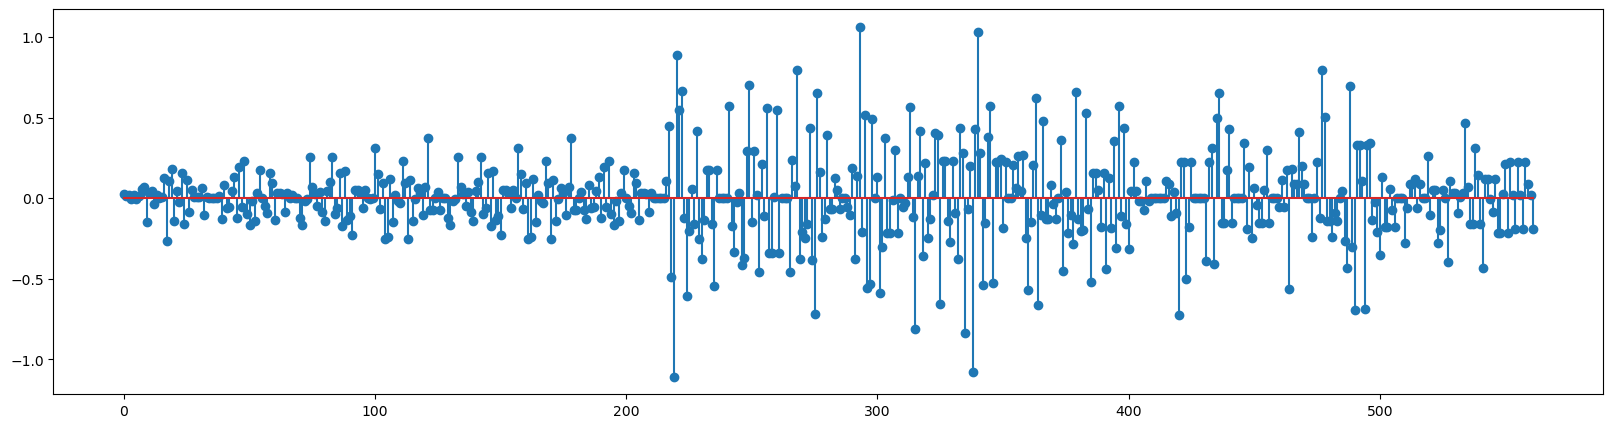

In [78]:
# plotting weight values for all attributes and 2nd degree interactions

plt.figure(figsize=(20,5))
plt.stem(w);

In [79]:
# display weights and corresponding features for a random sample of 40

comb_data = np.concatenate((w,comb_list.reshape(-1,1)),axis=1)
weights_and_features = pd.DataFrame(comb_data,
                                    columns=['Weights','Features'])
weights_and_features.sample(40)

,Weights,Features
510,-0.27626870275257,Morning + Gender
134,0.07151062433867532,City Yangon + Health and beauty
372,0.0,Cash + Credit card
500,-0.35521565218598816,Sunday + Gender
170,-0.2524903845889224,City Mandalay + Friday
344,0.3799835057231143,Health and beauty + Night
377,-0.10346415142493245,Cash + Friday
480,-0.1393059958856241,Friday + cogs
38,0.015658326952991658,Branch A + City Naypyitaw
488,0.694046565975631,Saturday + Night


#### explain the relationship between customer type, gender, day and timeslot for branch C.

In [80]:
# filter the attributes

filtered_attribs = ['Branch C','Gender']
filtered_attribs+=cc_columns[15:26]
filtered_attribs

['Branch C',
 'Gender',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Morning',
 'Afternoon',
 'Evening',
 'Night']

In [81]:
filtered_attribs_idx = []
for attrib in filtered_attribs:
    index = cc_columns.index(attrib)
    filtered_attribs_idx.append(index)
filtered_attribs_idx=np.array(filtered_attribs_idx)
filtered_attribs_idx

array([ 2, 26, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

In [82]:
# get the indices in the power matrix where there is atleast
# one category which belongs to filtered attributes of interest
attribs_needed = np.where(np.sum(power_matrix[:,filtered_attribs_idx], 
                                         axis=1)>=1)[0]


In [83]:
# sort the data based on weight values (highest weights come first)

df_attribs_of_interest = pd.DataFrame(np.hstack((w[attribs_needed], 
                        comb_list[attribs_needed].reshape(-1,1))),
            columns=['Weight', 'Combined Attributes'])

sorted_df = df_attribs_of_interest.iloc[
            df_attribs_of_interest['Weight'].astype(float)
            .abs().argsort()[::-1]]
sorted_df.head(40)

,Weight,Combined Attributes
105,-1.1082950986451805,Fashion accessories + Monday
169,-1.0809871415557608,Health and beauty + Friday
143,1.0636668516646373,Sports and travel + Wednesday
171,1.0343494336874715,Health and beauty + Sunday
106,0.8888022173233394,Fashion accessories + Tuesday
166,-0.8348038832939977,Health and beauty + Tuesday
155,-0.8133382180886463,Home and lifestyle + Wednesday
129,0.7967049461056863,Food and beverages + Monday
281,0.7945510226464102,Friday + Gender
224,-0.7237255272116477,Monday + Quantity


Normal customers make sports and travel purchases on Wednesday and purchase health and beauty products on Sunday.
Members buy fashion accessories on Mondays and health and beauty products on Fridays.

### 6. Train a classifier to predict the day of purchase (Monday, Tuesday, etc.).

It is a multi class classification. We will apply hyperparameter tuning and select best parameters. We will use logistic regression and random forest classifiers.

In [84]:
t_train = df_train_clf[['Monday', 'Tuesday', 'Wednesday', 
                        'Thursday', 'Friday', 'Saturday', 'Sunday']]

X_train = df_train_clf.drop(['Monday', 'Tuesday', 'Wednesday', 
                             'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                                axis=1)
X_train.shape, t_train.shape

((800, 27), (800, 7))

In [85]:
# converting back from one hot encoding to integer encoding because now it is target variable

t_train = np.where(t_train==1)[1]
t_train.shape

(800,)

In [86]:
# build random forest classifier

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=53)
param_grid = {'n_estimators': np.arange(10,200,5)}

grid_search = GridSearchCV(rf_model, param_grid,
                          scoring='accuracy',
                          n_jobs=-1,
                          cv=10,
                          refit=True)
grid_search.fit(X_train, t_train)

grid_search.best_params_

{'n_estimators': 40}

In [87]:
rf = grid_search.best_estimator_

y_train = rf.predict(X_train)

In [88]:
scores = cross_val_score(rf, 
                        X_train, t_train,
                        n_jobs=-1,
                        cv=10, 
                        scoring='accuracy')

confidence = 0.95
print('Training accuracy: ', accuracy_score(t_train, y_train))
print('95% CI: ', stats.t.interval(confidence, len(scores) - 1,
                 loc=scores.mean(),
                 scale=scores.std(ddof=1)/np.sqrt(len(scores))))

Training accuracy:  1.0
95% CI:  (0.12761049873589952, 0.2098895012641005)


In [89]:
# save the model

joblib.dump(rf,"random_forest_clf.pkl");

In [90]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', random_state=53)

param_grid = {'penalty': ['l1','l2', 'elasticnet'],
             'C': np.linspace(0.3, 1.8, 100)}

grid_search = GridSearchCV(log_reg, param_grid,
                          scoring='accuracy',
                          n_jobs=-1,
                          cv=10,
                          refit=True)
grid_search.fit(X_train, t_train)

grid_search.best_params_

/Users/abhi_telukunta/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abhi_telukunta/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abhi_telukunta/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abhi_telukunta/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abhi_telukunta/anaconda3/envs/aml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

{'C': 0.3303030303030303, 'penalty': 'l1'}

In [91]:
log_reg = grid_search.best_estimator_

y_train= log_reg.predict(X_train)

scores = cross_val_score(log_reg, 
                        X_train, t_train,
                        n_jobs=-1,
                        cv=10, 
                        scoring='accuracy')

confidence = 0.95
print('Training accuracy: ', accuracy_score(t_train, y_train))
print('95% CI: ', stats.t.interval(confidence, len(scores) - 1,
                 loc=scores.mean(),
                 scale=scores.std(ddof=1)/np.sqrt(len(scores))))

Training accuracy:  0.22375
95% CI:  (0.1376389128323543, 0.1773610871676457)


In [92]:
# save the model

joblib.dump(log_reg,"log_reg_multiclass.pkl");